# chofifah fitrotul hasanah

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving weather_history.csv to weather_history (1).csv


In [11]:
data_train = pd.read_csv('/content/weather_history (1).csv')
data_train = data_train [['Formatted Date', 'Temperature (C)']]
data_train

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556
...,...,...
2104,2006-12-05 16:00:00.000 +0100,8.022222
2105,2006-12-05 17:00:00.000 +0100,7.822222
2106,2006-12-05 18:00:00.000 +0100,7.755556
2107,2006-12-05 19:00:00.000 +0100,7.250000


In [12]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

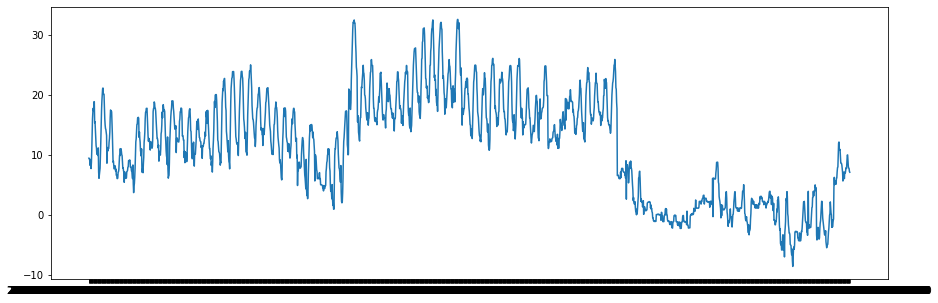

In [13]:
dates = data_train['Formatted Date'].values
temp  = data_train['Temperature (C)'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp);

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

train_size = int(len(data_train)*0.8) # #80% untuk training dan 20% untuk testing
train, test = data_train.iloc[0:train_size], data_train.iloc[train_size:len(data_train)]

print(train.shape, test.shape)

(1687, 2) (422, 2)


In [15]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [16]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM(60, return_sequences=True),
                                    tf.keras.layers.LSTM(60),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(30, activation="relu"),
                                    tf.keras.layers.Dense(10, activation="relu"),
                                    tf.keras.layers.Dense(1),
                                    ])

In [17]:
class my_allback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('mae') < 0.1):
            print("MAE has reached below 10%")

    def on_train_end(self, epoch, logs={}):
        print('Done')

callbacks = my_allback()

In [18]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [52]:
history = model.fit(train_set,epochs=100, callbacks=[callbacks], shuffle=False)

Epoch 1/100
21/21 [==============================] - 2s 109ms/step - loss: 1.0952 - mae: 1.5105
Epoch 2/100
21/21 [==============================] - 2s 104ms/step - loss: 1.0751 - mae: 1.4867
Epoch 3/100
21/21 [==============================] - 2s 106ms/step - loss: 1.0802 - mae: 1.4920
Epoch 4/100
21/21 [==============================] - 2s 102ms/step - loss: 1.0895 - mae: 1.5031
Epoch 5/100
21/21 [==============================] - 2s 98ms/step - loss: 1.0701 - mae: 1.4831
Epoch 6/100
21/21 [==============================] - 2s 107ms/step - loss: 1.0803 - mae: 1.4953
Epoch 7/100
21/21 [==============================] - 2s 103ms/step - loss: 1.0640 - mae: 1.4852
Epoch 8/100
21/21 [==============================] - 2s 101ms/step - loss: 1.0726 - mae: 1.4877
Epoch 9/100
21/21 [==============================] - 3s 111ms/step - loss: 1.0570 - mae: 1.4662
Epoch 10/100
21/21 [==============================] - 2s 101ms/step - loss: 1.0655 - mae: 1.4841
Epoch 11/100
21/21 [====================